In [1]:
#modules importing

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential
     

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
#data importing
import pathlib

data_dir = '/kaggle/input/crop-images/crop_dataset'
data_dir = pathlib.Path(data_dir)
     

/kaggle/input/crop-images/crop_dataset/almond/images77.jpg


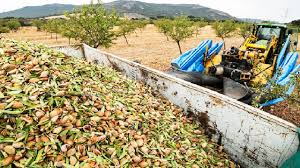

In [3]:
rws = list(data_dir.glob('almond/*'))
print(rws[0])
PIL.Image.open(str(rws[0]))

In [4]:
# data splitting
img_height,img_width=254,254
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1495 files belonging to 15 classes.
Using 1196 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.8,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1495 files belonging to 15 classes.
Using 1196 files for validation.


In [6]:
#classes
class_names = train_ds.class_names
print(class_names)

['almond', 'bitter gourd', 'broccoli', 'chickpea', 'cotton', 'cucumber', 'groundnut', 'maize', 'mustard', 'oat', 'rice', 'soybean', 'sugarcane', 'watermelon', 'wheat']


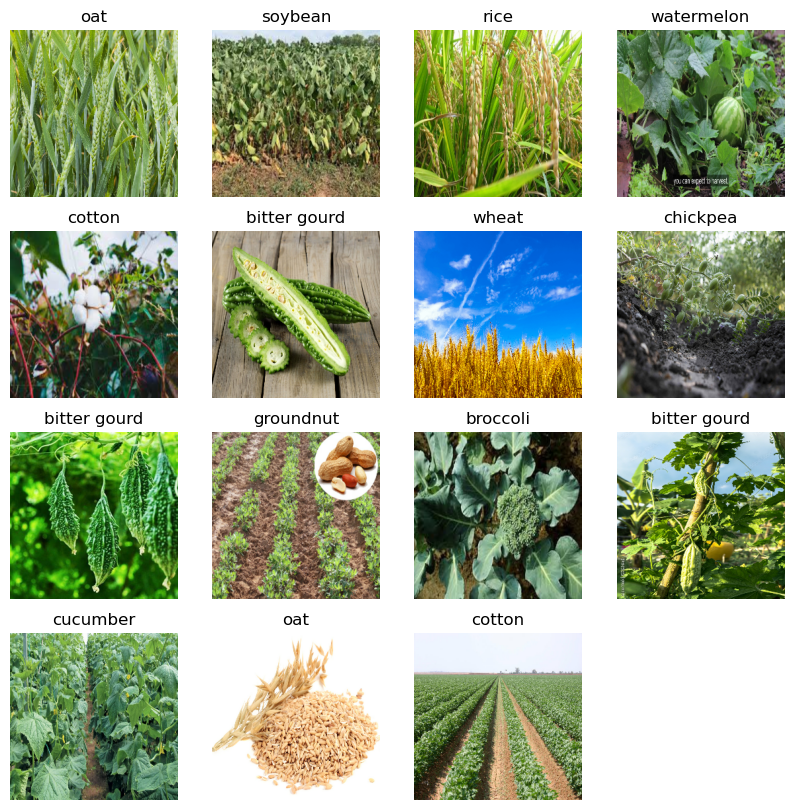

In [7]:
# plotting classes
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(15):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
# model building
num_classes = 15

model = Sequential([
     
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),

  layers.Dense(num_classes)
])
     

In [9]:
#compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
#model training
epochs=12
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/12
38/38 [==============================] - 99s 3s/step - loss: 2.7382 - accuracy: 0.1045 - val_loss: 2.4589 - val_accuracy: 0.1890
Epoch 2/12
38/38 [==============================] - 76s 2s/step - loss: 2.2475 - accuracy: 0.2684 - val_loss: 2.0537 - val_accuracy: 0.3436
Epoch 3/12
38/38 [==============================] - 96s 2s/step - loss: 1.8658 - accuracy: 0.4256 - val_loss: 1.6088 - val_accuracy: 0.4883
Epoch 4/12
38/38 [==============================] - 96s 2s/step - loss: 1.3150 - accuracy: 0.5828 - val_loss: 1.1664 - val_accuracy: 0.6555
Epoch 5/12
38/38 [==============================] - 76s 2s/step - loss: 0.7867 - accuracy: 0.7559 - val_loss: 0.9531 - val_accuracy: 0.7575
Epoch 6/12
38/38 [==============================] - 76s 2s/step - loss: 0.4622 - accuracy: 0.8654 - val_loss: 0.7881 - val_accuracy: 0.8194
Epoch 7/12
38/38 [==============================] - 76s 2s/step - loss: 0.2275 - accuracy: 0.9431 - val_loss: 0.7732 - val_accuracy: 0.8503
Epoch 8/12
38/38 [==

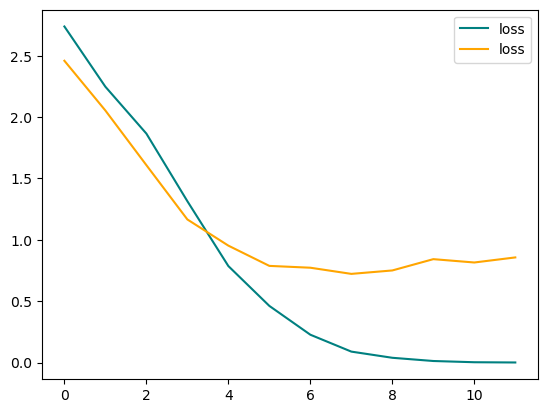

In [11]:
#plotting loss
fig=plt.figure()
plt.plot(history.history['loss'],color='teal',label='loss')
plt.plot(history.history['val_loss'],color='orange',label='loss')
plt.legend(loc="upper right")
plt.show()

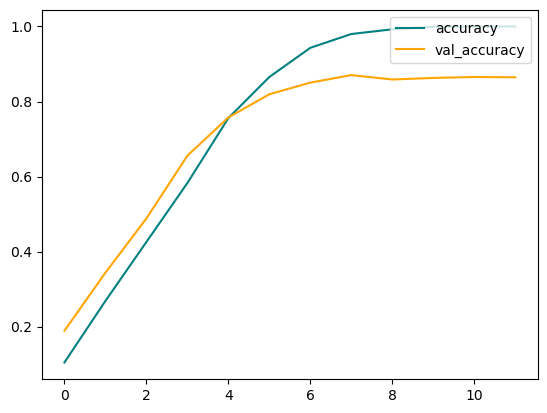

In [12]:
#plotting Accuracy
fig1=plt.figure()
plt.plot(history.history['accuracy'],color='teal',label='accuracy')
plt.plot(history.history['val_accuracy'],color='orange',label='val_accuracy')
plt.legend(loc="upper right")
plt.show()

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_image_classifier.h5')

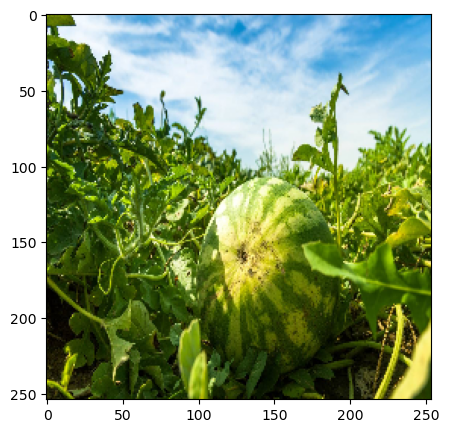

1/1 [==============================] - 0s 156ms/step
tf.Tensor(
[[2.2893040e-08 5.6016858e-11 9.3877826e-16 1.0720121e-15 8.6264867e-12
  2.5141753e-11 2.0064281e-09 2.6210418e-09 5.3069846e-09 1.3247995e-14
  1.1436350e-11 7.7075288e-07 1.8603080e-15 9.9999917e-01 5.2203711e-14]], shape=(1, 15), dtype=float32)
watermelon


In [13]:
model=model
image_dir ="/kaggle/input/crop-images/crop_dataset/watermelon/1_522d7b1c-bd86-40b7-b403-3bf59bd1023f.jpg"
img_size=254
img=keras.preprocessing.image.load_img(image_dir,target_size=(img_size,img_size))
img_array=keras.preprocessing.image.img_to_array(img)
img_array=np.array(img_array).reshape(-1,img_size,img_size,3)

plt.figure(figsize=(5,5))
plt.imshow(img)
plt.show()

prediction=model.predict([img_array])
score=tf.nn.softmax(prediction)
print(score)
class_names=os.listdir(data_dir)

print(class_names[np.argmax(score)])

In [14]:
import pickle

model_pkl_file = "crop_image_classifier_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)